In [1]:
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
import sys
codefolder = '../../../../crispy'
if codefolder not in sys.path: sys.path.append(codefolder)
from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.params import Params
codefolder = '../../../crispy'
par = Params(codefolder)
par.wavecalDir = par.prefix+'/wavecalR50_770_test/'
par.hdr


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                    2 / Interlacing                                    
PHILENS =    26.565051177077

In [2]:
from crispy.IFS import reduceIFSMapList
filelist = np.sort(glob.glob(par.wavecalDir + "det*.fits"))
reduceIFSMapList(par,filelist,method='lstsq')

crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_700.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_710.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_720.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_730.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_740.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_750.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_760.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_770.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/wavecalR50_770_test/det_780.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/Referenc

crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Elapsed time: 128.535863s


crispy - INFO - Reduced cube will have 10 wavelength bins
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_700_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_710_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_720_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_730_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_740_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_750_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_760_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_770_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_780_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/SimResults/det_790_red_lstsq.fits
crispy - INFO - Read data from HDU 0 of ..

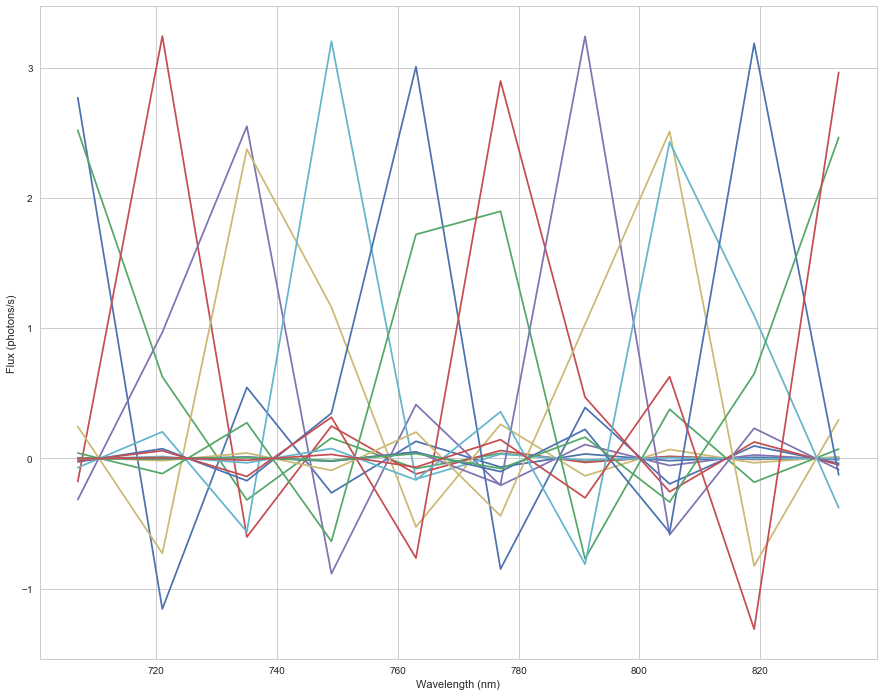

In [13]:
import seaborn as sns
sns.set_style('whitegrid')
from crispy.tools.image import Image
red_filelist = [par.exportDir+"/"+filename.split('/')[-1].split('.')[0]+'_red_lstsq.fits' for filename in filelist]
fig,ax = plt.subplots(figsize=(15,12))
from crispy.tools.reduction import calculateWaveList
lam_mid,lam_end = calculateWaveList(par)

for filename in red_filelist:
    img = Image(filename)
    wavs,nx,ny = img.data.shape
    ax.plot(lam_mid,img.data[:,ny//2,nx//2])
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (photons/s)')
plt.show()

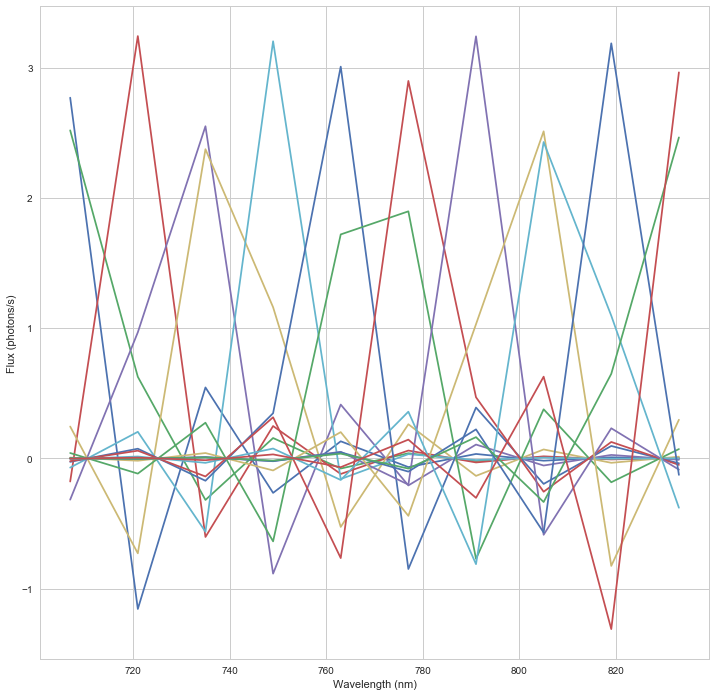

# Constructing fiducials inputs for benchmarking

### monochromatic wavelengths at different separations

In [46]:
from astropy.io import fits
from crispy.IFS import polychromeIFS
par.saveDetector=False
inputCube = np.ones((1,512,512),dtype=float)
inCube = fits.HDUList(fits.PrimaryHDU(inputCube))
lamc = 770.
inCube[0].header['LAM_C'] = lamc/1000.
inCube[0].header['PIXSIZE'] = 0.1
dlam=2.
filelist = []
ref = polychromeIFS(par,[749.],inCube[0],dlambda=dlam,parallel=False)
for separation in np.arange(2,50,2):
    detectorFrame = polychromeIFS(par,[749.+separation],inCube[0],dlambda=dlam,parallel=False)
    filename = par.exportDir+'/sep%d.fits' % (separation)
    filelist.append(filename)
    Image(data=detectorFrame+ref).write(filename)
    

crispy - INFO - Using PSFlet gaussian approximation
crispy - INFO - Assuming slices are evenly spread in wavelengths
[ 748.  750.]
crispy - INFO - Number of detector pixels per lenslet: 13.384615
crispy - INFO - Rebinning final detector. Image has dimensions 1024x1024
crispy - INFO - Done.
crispy - INFO - Performance: 4 seconds total
crispy - INFO - Using PSFlet gaussian approximation
crispy - INFO - Assuming slices are evenly spread in wavelengths
[ 750.  752.]
crispy - INFO - Number of detector pixels per lenslet: 13.384615
crispy - INFO - Rebinning final detector. Image has dimensions 1024x1024
crispy - INFO - Done.
crispy - INFO - Performance: 4 seconds total
crispy - INFO - Writing data to ../../../crispy/SimResults/sep2.fits
crispy - INFO - Using PSFlet gaussian approximation
crispy - INFO - Assuming slices are evenly spread in wavelengths
[ 752.  754.]
crispy - INFO - Number of detector pixels per lenslet: 13.384615
crispy - INFO - Rebinning final detector. Image has dimensions 

crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep2.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep4.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep6.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep8.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep10.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep12.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep14.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep16.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/sep18.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INF

crispy - INFO - Writing data to ../../../crispy/SimResults/sep4_red_optext.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/sep8_red_optext.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/sep2_red_optext.fits


crispy - INFO - Reduced cube will have 18 wavelength bins


crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Writing data to ../../../crispy/SimResults/sep12_red_optext.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Writing data to ../../../crispy/SimResults/sep16_red_optext.fits
crispy - INFO - Reduced cube will have 18 wavelength bins


crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Writing data to ../../../crispy/SimResults/sep6_red_optext.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/sep14_red_optext.fits


crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Writing data to ../../../crispy/SimResults/sep10_red_optext.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Writing data to ../../../crispy/SimResults/sep18_red_optext.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Writing data to ../../../crispy/SimResults/sep24_red_optext.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/sep26_red_optext.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/sep28_red_optext.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/sep20_red_optext.fits
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Reduced cube will have 18 wavelength bins
crispy - INFO - Writing data to ../../../crispy/Si

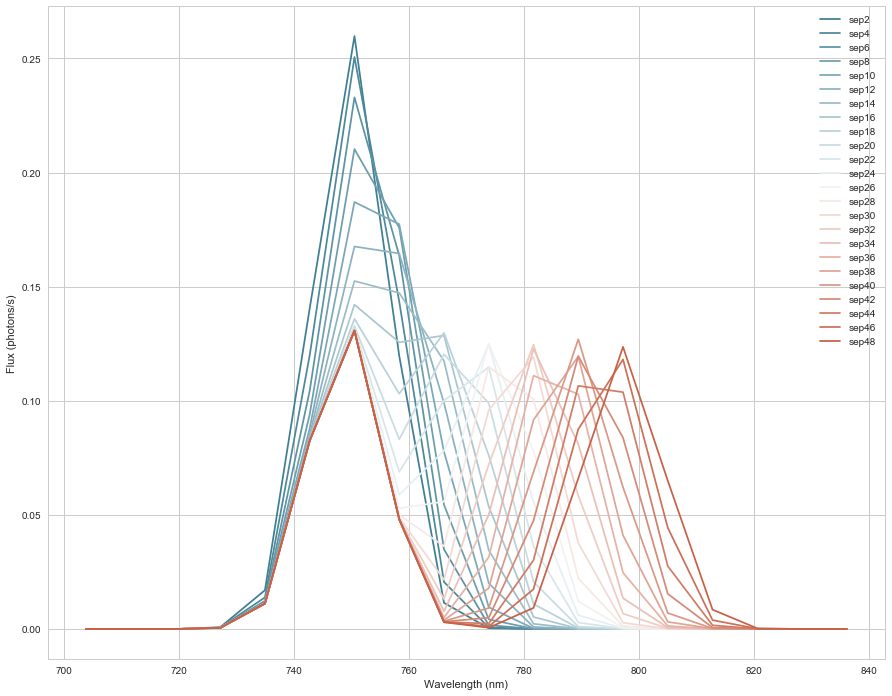

In [3]:
import re
from crispy.IFS import reduceIFSMapList

def sort_nicely( l ):
    """ Sort the given list in the way that humans expect.
    """
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    l.sort( key=alphanum_key )
    return l
filelist = sort_nicely([f for f in glob.glob(par.exportDir + "/sep*.fits") if "red" not in f])
#reduceIFSMapList(par,filelist,method='lstsq')
reduceIFSMapList(par,filelist)
print(filelist)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette(sns.diverging_palette(220, 20, n=25))
from crispy.tools.image import Image
#red_filelist = [par.exportDir+"/"+filename.split('/')[-1].split('.')[0]+'_red_lstsq.fits' for filename in filelist]
red_filelist = [par.exportDir+"/"+filename.split('/')[-1].split('.')[0]+'_red_optext.fits' for filename in filelist]
print(red_filelist)
fig,ax = plt.subplots(figsize=(15,12))
from crispy.tools.reduction import calculateWaveList
Nspec = int(par.BW*par.npixperdlam*par.R+1)
lam_mid,lam_end = calculateWaveList(par,Nspec=Nspec)
# flatfield = Image(par.exportDir+"/flatfield_red_lstsq.fits")
flatfield = Image(par.exportDir+"/flatfield_red_optext.fits")
for filename in red_filelist:
    img = Image(filename)
    wavs,nx,ny = img.data.shape
    ax.plot(lam_mid,img.data[:,ny//2,nx//2]/flatfield.data[:,ny//2,nx//2],label="sep"+filename.split("sep")[-1].split("_")[0])
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (photons/s)')
plt.legend()
plt.show()

In [51]:
Nspec = int(par.BW*par.npixperdlam*par.R+1)
lam_mid,lam_end = calculateWaveList(par,Nspec=Nspec)
print(lam_mid)

crispy - INFO - Reduced cube will have 18 wavelength bins
[ 703.88888889  711.66666667  719.44444444  727.22222222  735.
  742.77777778  750.55555556  758.33333333  766.11111111  773.88888889
  781.66666667  789.44444444  797.22222222  805.          812.77777778
  820.55555556  828.33333333  836.11111111]
